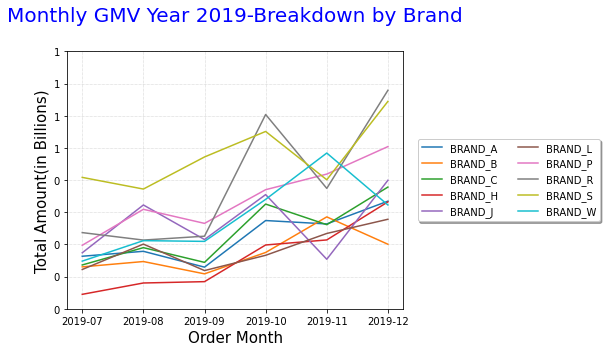

In [2]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt# Baca dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019-Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount(in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels,locations=plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10,5)
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5), shadow=True, ncol=2)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

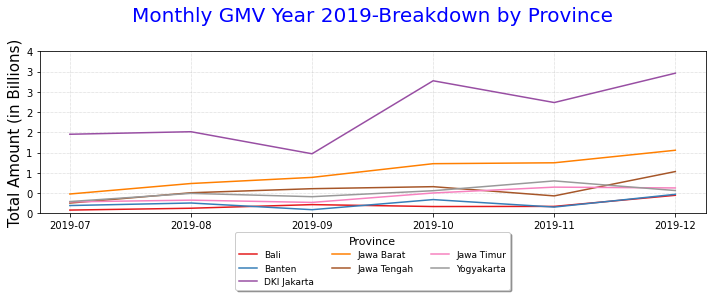

In [3]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019-Breakdown by Province', loc='center', pad = 30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations=plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [5]:
top_provinces = (dataset.groupby('province')['gmv']
                 .sum()
                 .reset_index()
                 .sort_values(by='gmv', ascending=False)
                 .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


In [6]:
dataset['province_top'] =dataset['province'].apply(lambda x: x if(x in top_provinces['province'].to_list()) else'other')

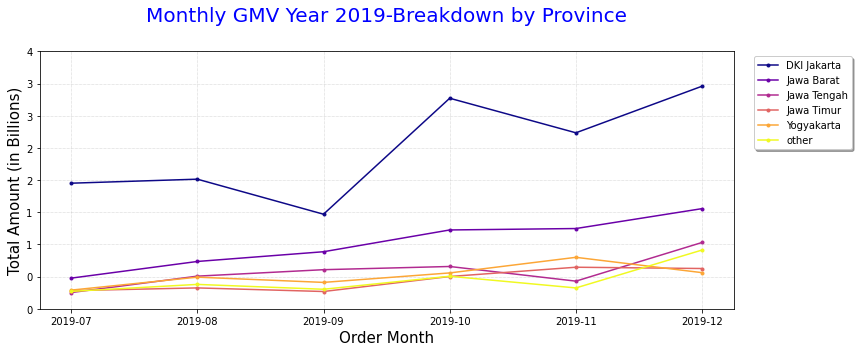

In [8]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack(). plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019-Breakdown by Province', loc='center', pad = 30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations=plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


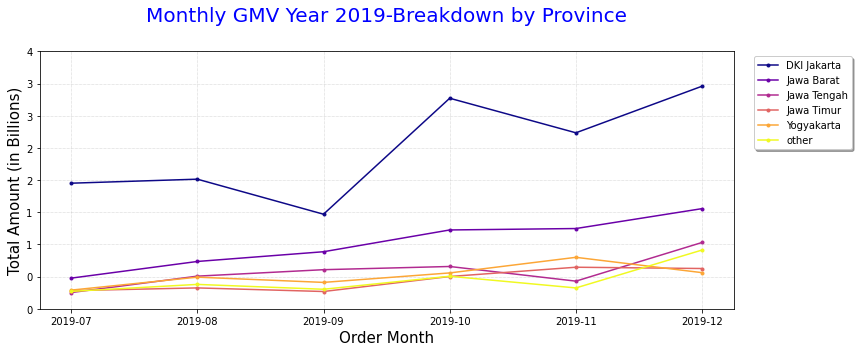

In [9]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] =dataset['province'].apply(lambda x: x if(x in top_provinces['province'].to_list()) else'other')# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack(). plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019-Breakdown by Province', loc='center', pad = 30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations=plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

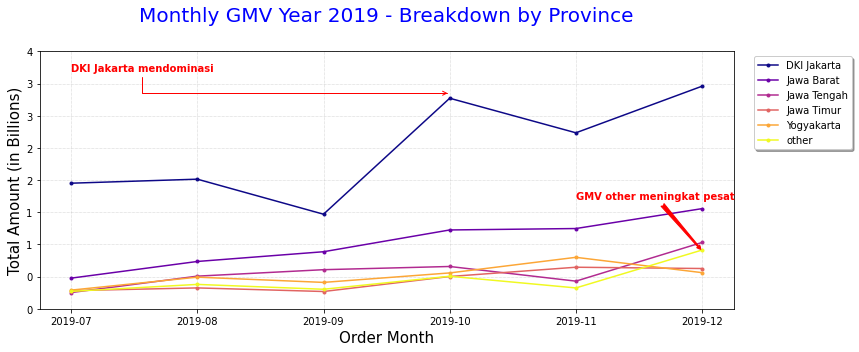

In [10]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle="arc3",
                             color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

In [12]:
dataset_dki_q4 =dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019–10')]